In [1]:
!wget https://s3.eu-central-1.amazonaws.com/jkan.pl/data-science/uek/otomoto.csv

--2020-11-20 12:49:18--  https://s3.eu-central-1.amazonaws.com/jkan.pl/data-science/uek/otomoto.csv
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.75.87
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.75.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20920699 (20M) [text/csv]
Saving to: ‘otomoto.csv.1’

otomoto.csv.1       100%[===================>]  19.95M  3.21MB/s    in 6.3s    

2020-11-20 12:49:25 (3.16 MB/s) - ‘otomoto.csv.1’ saved [20920699/20920699]



In [2]:
pip install seaborn matplotlib

     |████████████████████████████████| 283 kB 860 kB/s eta 0:00:01
     |████████████████████████████████| 29.0 MB 4.5 MB/s eta 0:00:0101
You should consider upgrading via the '/Users/jkanclerz/.venv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)


In [4]:
df = pd.read_csv("otomoto.csv", sep=";")
df.head(5)

,id,url,Faktura VAT,Marka pojazdu,Model pojazdu,Kategoria,Pojemność skokowa,Liczba miejsc,Zarejestrowany w Polsce,Wersja,...,Metalik,Przebieg,Akryl (niemetalizowany),Możliwość finansowania,Uszkodzony,Oferta od,Kod Silnika,Kolor,Napęd,Moc
0,6039269187,https://www.otomoto.pl/oferta/renault-fluence-...,NaN,Renault,Fluence,Osobowe,1 600 cm3,5.0,NaN,NaN,...,NaN,172 000 km,Tak,NaN,NaN,Osoby prywatnej,NaN,Biały,Na przednie koła,110 KM
1,6034090022,https://www.otomoto.pl/oferta/mercedes-benz-kl...,Tak,Mercedes-Benz,Klasa G,Osobowe,2 987 cm3,5.0,Tak,W463 (1992-),...,Tak,52 904 km,NaN,Tak,NaN,Firmy,G 350,Szary,4x4 (stały),245 KM
2,6039268812,https://www.otomoto.pl/oferta/audi-a5-salon-po...,NaN,Audi,A5,Osobowe,2 000 cm3,4.0,Tak,8T (2007-2016),...,NaN,56 000 km,NaN,NaN,Tak,Osoby prywatnej,NaN,Czarny,Na przednie koła,190 KM
3,6039269107,https://www.otomoto.pl/oferta/volkswagen-polo-...,NaN,Volkswagen,Polo,Osobowe,1 198 cm3,5.0,NaN,IV (2001-2009),...,Tak,88 000 km,NaN,NaN,NaN,Osoby prywatnej,NaN,Srebrny,Na przednie koła,70 KM
4,6038674457,https://www.otomoto.pl/oferta/peugeot-206-cc-w...,NaN,Peugeot,206 CC,Osobowe,1 997 cm3,4.0,NaN,NaN,...,Tak,176 000 km,NaN,NaN,NaN,Osoby prywatnej,NaN,Srebrny,Na przednie koła,136 KM


In [5]:
df.dtypes

id                                 int64
url                               object
Faktura VAT                       object
Marka pojazdu                     object
Model pojazdu                     object
Kategoria                         object
Pojemność skokowa                 object
Liczba miejsc                    float64
Zarejestrowany w Polsce           object
Wersja                            object
Typ                               object
Rok produkcji                    float64
Serwisowany w ASO                 object
Leasing                           object
VIN                               object
Homologacja ciężarowa             object
VAT marża                         object
Pierwszy właściciel               object
Filtr cząstek stałych             object
Rodzaj paliwa                     object
Emisja CO2                        object
Kraj pochodzenia                  object
Numer rejestracyjny pojazdu       object
Bezwypadkowy                      object
Stan            

In [6]:
df = df.drop(['Skrzynia biegów', 'Moc', 'Faktura VAT'], axis=1)
df.head(5)

,id,url,Marka pojazdu,Model pojazdu,Kategoria,Pojemność skokowa,Liczba miejsc,Zarejestrowany w Polsce,Wersja,Typ,...,Liczba drzwi,Metalik,Przebieg,Akryl (niemetalizowany),Możliwość finansowania,Uszkodzony,Oferta od,Kod Silnika,Kolor,Napęd
0,6039269187,https://www.otomoto.pl/oferta/renault-fluence-...,Renault,Fluence,Osobowe,1 600 cm3,5.0,NaN,NaN,Sedan,...,4.0,NaN,172 000 km,Tak,NaN,NaN,Osoby prywatnej,NaN,Biały,Na przednie koła
1,6034090022,https://www.otomoto.pl/oferta/mercedes-benz-kl...,Mercedes-Benz,Klasa G,Osobowe,2 987 cm3,5.0,Tak,W463 (1992-),SUV,...,5.0,Tak,52 904 km,NaN,Tak,NaN,Firmy,G 350,Szary,4x4 (stały)
2,6039268812,https://www.otomoto.pl/oferta/audi-a5-salon-po...,Audi,A5,Osobowe,2 000 cm3,4.0,Tak,8T (2007-2016),Sedan,...,5.0,NaN,56 000 km,NaN,NaN,Tak,Osoby prywatnej,NaN,Czarny,Na przednie koła
3,6039269107,https://www.otomoto.pl/oferta/volkswagen-polo-...,Volkswagen,Polo,Osobowe,1 198 cm3,5.0,NaN,IV (2001-2009),Auta miejskie,...,5.0,Tak,88 000 km,NaN,NaN,NaN,Osoby prywatnej,NaN,Srebrny,Na przednie koła
4,6038674457,https://www.otomoto.pl/oferta/peugeot-206-cc-w...,Peugeot,206 CC,Osobowe,1 997 cm3,4.0,NaN,NaN,Kabriolet,...,2.0,Tak,176 000 km,NaN,NaN,NaN,Osoby prywatnej,NaN,Srebrny,Na przednie koła


In [7]:
df = df.rename(columns={"Marka pojazdu": "marka"})

In [8]:
df.head(5)

,id,url,marka,Model pojazdu,Kategoria,Pojemność skokowa,Liczba miejsc,Zarejestrowany w Polsce,Wersja,Typ,...,Liczba drzwi,Metalik,Przebieg,Akryl (niemetalizowany),Możliwość finansowania,Uszkodzony,Oferta od,Kod Silnika,Kolor,Napęd
0,6039269187,https://www.otomoto.pl/oferta/renault-fluence-...,Renault,Fluence,Osobowe,1 600 cm3,5.0,NaN,NaN,Sedan,...,4.0,NaN,172 000 km,Tak,NaN,NaN,Osoby prywatnej,NaN,Biały,Na przednie koła
1,6034090022,https://www.otomoto.pl/oferta/mercedes-benz-kl...,Mercedes-Benz,Klasa G,Osobowe,2 987 cm3,5.0,Tak,W463 (1992-),SUV,...,5.0,Tak,52 904 km,NaN,Tak,NaN,Firmy,G 350,Szary,4x4 (stały)
2,6039268812,https://www.otomoto.pl/oferta/audi-a5-salon-po...,Audi,A5,Osobowe,2 000 cm3,4.0,Tak,8T (2007-2016),Sedan,...,5.0,NaN,56 000 km,NaN,NaN,Tak,Osoby prywatnej,NaN,Czarny,Na przednie koła
3,6039269107,https://www.otomoto.pl/oferta/volkswagen-polo-...,Volkswagen,Polo,Osobowe,1 198 cm3,5.0,NaN,IV (2001-2009),Auta miejskie,...,5.0,Tak,88 000 km,NaN,NaN,NaN,Osoby prywatnej,NaN,Srebrny,Na przednie koła
4,6038674457,https://www.otomoto.pl/oferta/peugeot-206-cc-w...,Peugeot,206 CC,Osobowe,1 997 cm3,4.0,NaN,NaN,Kabriolet,...,2.0,Tak,176 000 km,NaN,NaN,NaN,Osoby prywatnej,NaN,Srebrny,Na przednie koła


In [9]:
df.shape

(51186, 39)

In [10]:
df.count()   

id                               51186
url                              51186
marka                            50716
Model pojazdu                    50716
Kategoria                        50718
Pojemność skokowa                48373
Liczba miejsc                    45424
Zarejestrowany w Polsce          24823
Wersja                           38713
Typ                              50716
Rok produkcji                    50716
Serwisowany w ASO                24407
Leasing                           7549
VIN                              12952
Homologacja ciężarowa              376
VAT marża                        15192
Pierwszy właściciel              22416
Filtr cząstek stałych             3277
Rodzaj paliwa                    50716
Emisja CO2                        1190
Kraj pochodzenia                 34956
Numer rejestracyjny pojazdu       3063
Bezwypadkowy                     32514
Stan                             50718
Pierwsza rejestracja             19204
title                    

In [11]:
df = df[['marka', 'price', 'Rok produkcji']]

In [12]:
df.head(10)

,marka,price,Rok produkcji
0,Renault,25900.0,2013.0
1,Mercedes-Benz,434900.0,2016.0
2,Audi,41900.0,2011.0
3,Volkswagen,14900.0,2007.0
4,Peugeot,5900.0,2001.0
5,Volkswagen,7900.0,2003.0
6,BMW,9800.0,2002.0
7,Audi,98900.0,2013.0
8,Hyundai,14480.0,2004.0
9,Volkswagen,64900.0,2014.0


In [13]:
df.count()

marka            50716
price            51185
Rok produkcji    50716
dtype: int64

In [27]:
df['price'].quantile(q=0.95)

127900.0

In [29]:
df['price'].quantile(q=0.00)

500.0

In [14]:
df = df.dropna()

In [24]:
df.count()
df = df[df['price'] < df['price'].quantile(q=0.95)]

<AxesSubplot:xlabel='price'>

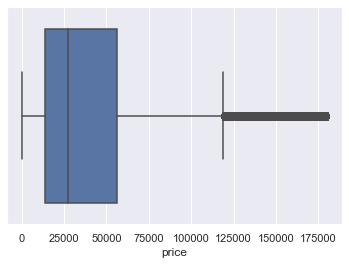

In [25]:
sns.boxplot(x=df['price'])

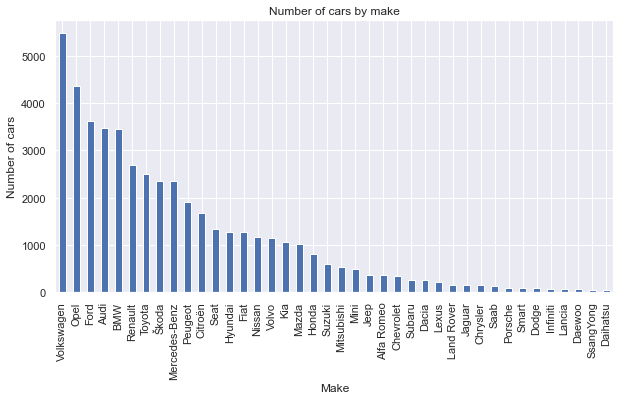

In [26]:
df.marka.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

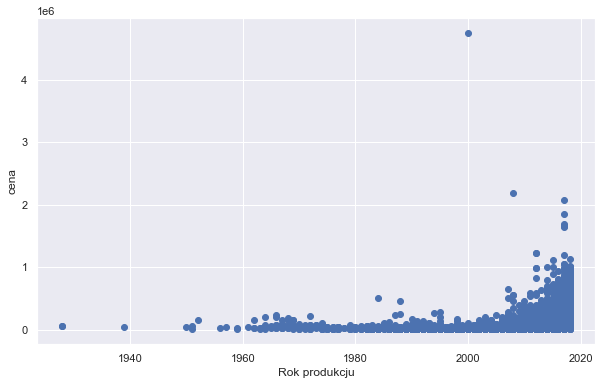

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Rok produkcji'], df['price'])
ax.set_xlabel('Rok produkcju')
ax.set_ylabel('cena')
plt.show()